# Image classification using CNN

## Aim: To implement a CNN model to classify images.
## Dataset: Collection of images of animals belonging to 3 classes namely:
  * Cat
  * Dog
  * Tiger

In [ ]:
!pip install split-folders -q

In [ ]:
import matplotlib.pyplot as plt
import splitfolders
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from collections import Counter

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
path='/content/drive/MyDrive/animals'

In [ ]:
#splitfolders.ratio(path,'/content/drive/MyDrive/classify',ratio=(0.70,0.15,0.15))

train_data=ImageDataGenerator(horizontal_flip=True)
train_set=train_data.flow_from_directory(
    '/content/drive/MyDrive/classify/train',
    target_size=(150,150),
    shuffle=True,
    color_mode='rgb')
x_train,y_train=train_set.next()

In [ ]:
train_data=ImageDataGenerator(rotation_range=90)
train_set=train_data.flow_from_directory(
    '/content/drive/MyDrive/classify/train',
    target_size=(150,150),
    shuffle=True,
    color_mode='rgb')
x_train,y_train=train_set.next()

Found 298 images belonging to 3 classes.


In [ ]:
val_data=ImageDataGenerator(rotation_range=90)
val_set=val_data.flow_from_directory(
    '/content/drive/MyDrive/classify/val',
    target_size=(150,150),
    shuffle=True,
    color_mode='rgb')
x_val,y_val=val_set.next()

Found 63 images belonging to 3 classes.


In [ ]:
test_data=ImageDataGenerator(rotation_range=90)
test_set=test_data.flow_from_directory(
    '/content/drive/MyDrive/classify/test',
    target_size=(150,150),
    shuffle=True,
    color_mode='rgb')
x_test,y_test=test_set.next()

Found 67 images belonging to 3 classes.


In [ ]:
print(f'Shape of Train set \nX:{x_train.shape}\tY:{y_train.shape}\n')
print(f'Shape of val set \nX:{x_val.shape}\tY:{y_val.shape}\n')
print(f'Shape of Test set \nX:{x_test.shape}\tY:{y_test.shape}\n')

Shape of Train set 
X:(32, 150, 150, 3)	Y:(32, 3)

Shape of val set 
X:(32, 150, 150, 3)	Y:(32, 3)

Shape of Test set 
X:(32, 150, 150, 3)	Y:(32, 3)



In [ ]:
print(f'The class labels are {train_set.class_indices}')

The class labels are {'cats': 0, 'dogs': 1, 'tiger': 2}


In [ ]:
b=val_set.classes
print(f'The classes in val set {Counter(b)}\n')
a=train_set.classes
print(f'The classes in train set {Counter(a)}\n')
c=test_set.classes
print(f'The classes in test set {Counter(c)}\n')

The classes in val set Counter({0: 27, 2: 22, 1: 14})

The classes in train set Counter({0: 125, 2: 105, 1: 68})

The classes in test set Counter({0: 28, 2: 23, 1: 16})



In [ ]:
y_train[0]

array([0., 0., 1.], dtype=float32)

In [ ]:
y_train=y_train.astype('int32')
y_val=y_val.astype('int32')
y_test=y_test.astype('int32')

In [ ]:
y_train[0]

array([0, 0, 1], dtype=int32)

Train Image


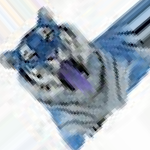

[0 0 1]

Val image


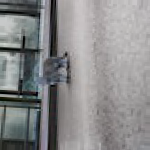

[1 0 0]

Test Image


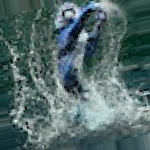

[0 0 1]


In [ ]:
print('Train Image')
cv2_imshow(x_train[0])
print(y_train[0])
print('\nVal image')
cv2_imshow(x_val[0])
print(y_val[0])
print('\nTest Image')
cv2_imshow(x_test[0])
print(y_test[0])

In [ ]:
model=Sequential()
model.add(Conv2D(6,kernel_size=3,input_shape=(150,150,3)))
MaxPool2D()
model.add(Conv2D(16,kernel_size=5,padding='valid',activation='tanh'))
AveragePooling2D()
model.add(Conv2D(120,kernel_size=7,padding='valid',activation='tanh'))
MaxPool2D()
model.add(Flatten())
model.add(Dense(84,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy']
              ,optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 6)       168       
                                                                 
 conv2d_10 (Conv2D)          (None, 144, 144, 16)      2416      
                                                                 
 conv2d_11 (Conv2D)          (None, 138, 138, 120)     94200     
                                                                 
 flatten_3 (Flatten)         (None, 2285280)           0         
                                                                 
 dense_12 (Dense)            (None, 84)                191963604 
                                                                 
 dense_13 (Dense)            (None, 120)               10200     
                                                                 
 dropout_3 (Dropout)         (None, 120)              

In [ ]:
mod=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.0503 - accuracy: 0.5000 - val_loss: 281.6865 - val_accuracy: 0.3125
Epoch 2/50
1/1 [==============================] - 0s 241ms/step - loss: 200.7490 - accuracy: 0.3125 - val_loss: 199.9072 - val_accuracy: 0.4688
Epoch 3/50
1/1 [==============================] - 0s 245ms/step - loss: 184.1295 - accuracy: 0.5000 - val_loss: 459.2166 - val_accuracy: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 232ms/step - loss: 407.9465 - accuracy: 0.2812 - val_loss: 152.3277 - val_accuracy: 0.3125
Epoch 5/50
1/1 [==============================] - 0s 238ms/step - loss: 126.8609 - accuracy: 0.2812 - val_loss: 111.9384 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 206ms/step - loss: 101.7128 - accuracy: 0.5625 - val_loss: 89.9402 - val_accuracy: 0.6875
Epoch 7/50
1/1 [==============================] - 0s 201ms/step - loss: 95.6538 - accuracy: 0.6250 - val_loss: 619.0860 - val_accuracy: 0.3438

Text(0.5, 1.0, 'Train Loss VS Val Loss')

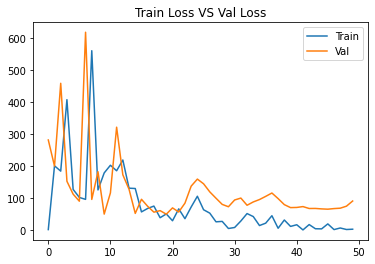

In [ ]:
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.legend(['Train','Val'])
plt.title('Train Loss VS Val Loss')

Text(0.5, 1.0, 'Train Accuracy VS Val Accuracy')

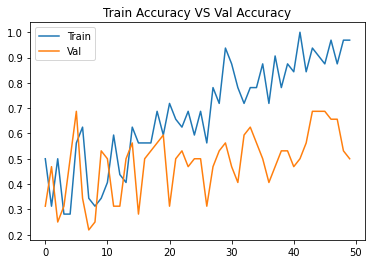

In [ ]:
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])
plt.legend(['Train','Val'])
plt.title('Train Accuracy VS Val Accuracy')

1/1 [==============================] - 0s 73ms/step


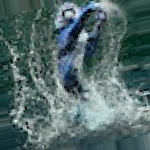

Test label : [0 0 1]
Predicted label : 2


In [ ]:
l=model.predict(x_test)
cv2_imshow(x_test[0])
print(f'Test label : {y_test[0]}')
print(f'Predicted label : {np.argmax(l[0])}')

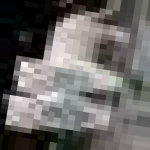

Test label : [0 0 1]
Predicted label : 0


In [ ]:
cv2_imshow(x_test[10])
print(f'Test label : {y_test[10]}')
print(f'Predicted label : {np.argmax(l[10])}')

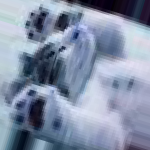

Test label : [1 0 0]
Predicted label : 0


In [ ]:
cv2_imshow(x_test[1])
print(f'Test label : {y_test[1]}')
print(f'Predicted label : {np.argmax(l[1])}')

In [ ]:
path='/content/drive/MyDrive/wolf-dog-breeds-siberian-husky-1570411330.jpg'
i=cv2.imread(path)
i=cv2.resize(i,(150,150))
i=i.reshape(-1,150,150,3)

In [ ]:
l1=model.predict(i)

1/1 [==============================] - 0s 70ms/step


In [ ]:
np.argmax(l1)

0

In [ ]:
for i in range(32):
  print(np.argmax(l[i]),end=' ')

2 0 2 0 2 1 1 2 2 1 0 0 0 2 1 2 0 0 2 0 0 0 0 2 0 0 0 1 0 2 0 0 

In [ ]:
model.save('image_classification')

## Conclsuion: The model has train accuracy of 78%, validation accuracy of 53%. The model is able to classify the images from all classes. But the classification is wrong. Therefore we will have to increase our data for more images so that our model can generalize better.